In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv(r'C:\Users\Roshan\.ssh\ml_demystified\projects\gis\gis_data.csv')
df.head()

,Unnamed: 0,city,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
0,0,بوئین زهرا,3454178378,35.76775,50.057667,35.76775,50.057667,3.454178e+09,NaN
1,1,بوئین زهرا,"35.767750, 50.057667",35.76775,50.057667,35.76775,50.057667,3.576775e+01,50.057667
2,2,بوئین زهرا,"35.767750, 50.057667",35.76775,50.057667,35.76775,50.057667,3.576775e+01,50.057667
3,3,بوئین زهرا,"35.767750, 50.057667",35.76775,50.057667,35.76775,50.057667,3.576775e+01,50.057667
4,4,بوئین زهرا,"35.767750, 50.057667",35.76775,50.057667,35.76775,50.057667,3.576775e+01,50.057667


In [19]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,city,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
0,بوئین زهرا,3454178378,35.76775,50.057667,35.76775,50.057667,3.454178e+09,NaN
1,بوئین زهرا,"35.767750, 50.057667",35.76775,50.057667,35.76775,50.057667,3.576775e+01,50.057667
2,بوئین زهرا,"35.767750, 50.057667",35.76775,50.057667,35.76775,50.057667,3.576775e+01,50.057667
3,بوئین زهرا,"35.767750, 50.057667",35.76775,50.057667,35.76775,50.057667,3.576775e+01,50.057667
4,بوئین زهرا,"35.767750, 50.057667",35.76775,50.057667,35.76775,50.057667,3.576775e+01,50.057667


In [20]:
df.isnull().any()

city                False
postal code          True
city_GIS_1           True
city_GIS_2           True
branch_GIS_1         True
branch_GIS_2         True
postalcode_GIS_1     True
postalcode_GIS_2     True
dtype: bool

In [21]:
print( df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   city              6899 non-null   object 
 1   postal code       6214 non-null   object 
 2   city_GIS_1        6886 non-null   float64
 3   city_GIS_2        6886 non-null   float64
 4   branch_GIS_1      4633 non-null   float64
 5   branch_GIS_2      4633 non-null   float64
 6   postalcode_GIS_1  5197 non-null   float64
 7   postalcode_GIS_2  5179 non-null   float64
dtypes: float64(6), object(2)
memory usage: 431.3+ KB
None


In [22]:
df.describe()

,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
count,6886.000000,6886.000000,4633.000000,4633.000000,5.197000e+03,5179.000000
mean,36.126343,50.054557,36.135882,50.119157,1.199879e+06,50.011474
std,0.197080,0.263723,0.178326,0.151452,4.945171e+07,0.265501
min,35.579889,49.222306,35.707574,49.694056,1.800000e+01,49.190333
25%,36.044611,50.007111,36.069361,50.057667,3.604461e+01,49.923722
50%,36.223528,50.057667,36.223528,50.182528,3.623058e+01,50.007111
75%,36.252528,50.182917,36.223528,50.182528,3.628853e+01,50.058972
max,36.542111,50.890361,36.288528,51.347655,3.454178e+09,50.890361


In [23]:
df['city'].value_counts()


محمدیه                1320
مجموعه شهری مهرگان    1150
قزوین                 1136
بوئین زهرا             803
آبیک                   615
تاکستان                523
اقبالیه                389
آوج                    223
محمودآبادنمونه         194
الوند                  159
ارداق                   82
آبگرم                   51
شال                     45
دانسفهان                41
ضیاآباد                 28
شریفیه                  26
بیدستان                 23
سگزآباد                 20
اسفرورین                16
نرجه                    11
معلم کلایه              10
کوهین                    9
رازمیان                  7
تهران                    4
خاکعلی                   4
ایرانشهر                 1
اصفهان                   1
بیجار                    1
طارم                     1
نظرآباد                  1
شهرجدیدهشتگرد            1
رباطکریم                 1
خرمدشت                   1
قم                       1
کرج                      1
Name: city, dtype: int64

c:\Users\Roshan\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


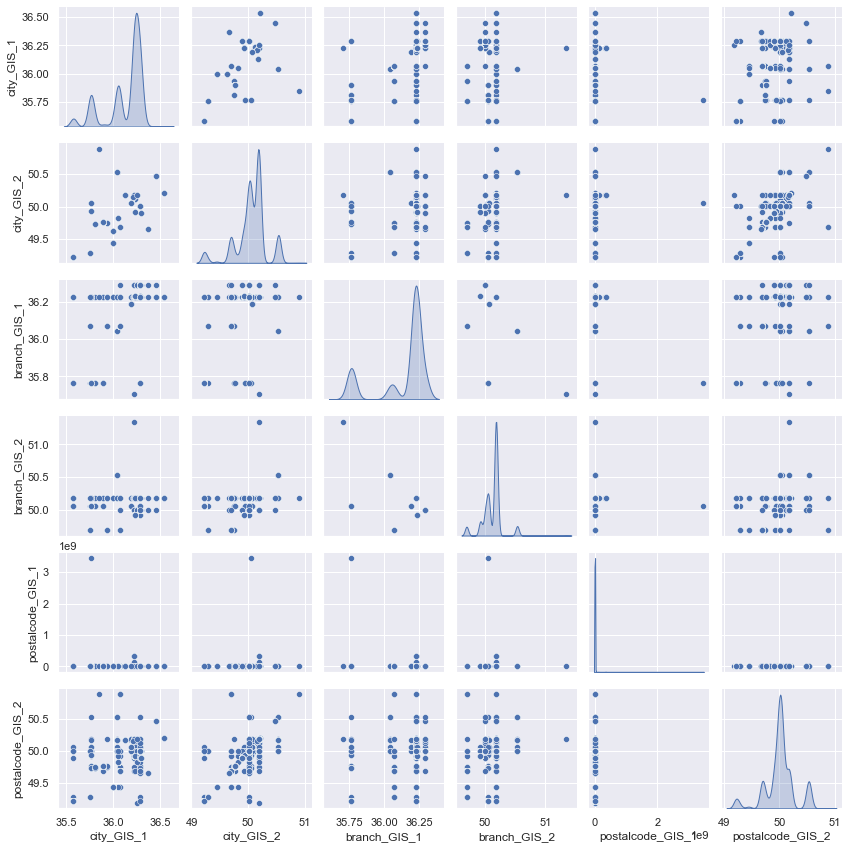

In [44]:
sns.set()
columns = ['city_GIS_1','city_GIS_2','branch_GIS_1','branch_GIS_2','postalcode_GIS_1','postalcode_GIS_2']
sns.pairplot(df[columns],size = 2,kind ='scatter',diag_kind='kde')
plt.show()